# Operations on Distributions

# 6.1 Skewness

* What is skewness?
    * It is a statistic that measures the asymmetry of a distribution
    * Given a sequence of values, `xi`, the sample skewness is:
    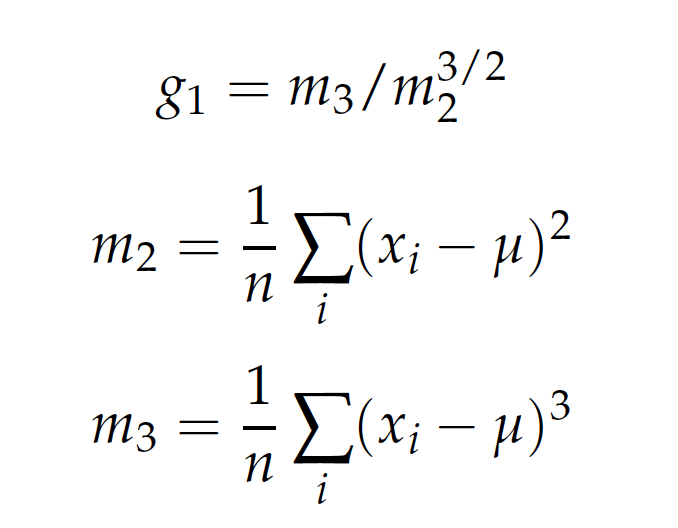
    * m2: mean squared deviation/variance
    * m3: mean cubed deviation

* Tails
    * The data on the right side of the curve may taper differently from the data on the left.
    * These taperings are known as “tails.” A negative skew refers to a longer tail on the left side of the distribution, while a positive skew refers to a longer tail on the right.
* What is negative skewness?
    * When a distribution skews <b> left </b>, so it extends to the left rather than the right
        * the tail is towards the left
* What is positive skewness?
    * When a distribution skews <b> right </b>
        * the tail is towards the right
       
        
        
## When do we use skewness?        
* In practice, computing the skewness of a sample isn't really a good idea
* If there are outliers, they have a disproportionate effect on g1

## How else do we evaluate the asymmetry of a distribution?
* Look at the relationship between mean and the median
    * Extreme values have more effect on the mean than the median
        * if a distribution skews left -> <b> the mean is less than the median </b>
          
## Pearson's median skewness coefficient
* Alternative measure of skewness that explicitly captures the relation between the mean, `u`(miu), and the median `u1/2` (miu subscript half)


* This statistic is <b> robust </b> which means it is less vulnerable to the effect of outliers

## Exercise 6.1 

> Write a function named Skewness that computes g1 for a sample.
> Compute the skewness for the distributions of pregnancy length and birth
weight. 
> Are the results consistent with the shape of the distributions? Write a function named PearsonSkewness that computes gp for these distributions.
> How does gp compare to g1?

* To calculate g1, we need to get
    * m3: mean cubed deviation
    * m2: mean squared deviation

In [28]:
import statistics
import numpy as np
import math

In [24]:
# alternative use np
def Skewness(xs):
    mean = np.mean(xs)
    m2 = np.mean(np.power((xs - mean), 2))
    m3 = np.mean(np.power((xs - mean), 3))
    g1 = m3 / math.pow(m2, 1.5)
    return g1

In [25]:
from random import seed
from random import randint
import random

In [26]:
dataset = [random.randint(0,10) for i in range(10)]

In [27]:
Skewness(dataset)

-0.8432314447951004

In [30]:
def PearsonSkewness(data):
    mean = np.mean(data)
    median = np.median(data)
    stdev = np.std(data)
    gp = 3*(mean-median)/stdev
    return gp

In [31]:
PearsonSkewness(dataset)

-0.43863316094572113

* Interesting, they have different values

--- 
## Exercise 6.2 
> * The “Lake Wobegon effect” is an amusing nickname1 for illusory superiority, which is the tendency for people to overestimate their abilities relative to others. 
> * For example, in some surveys, more than 80% of respondents believe that they are better than the average driver (see http://wikipedia.org/wiki/Illusory_superiority).
> * If we interpret “average” to mean median, then this result is logically impossible,
but if “average” is the mean, this result is possible, although unlikely.
> * What percentage of the population has more than the average number of
legs?

## Exercise 6.3 
> * The Internal Revenue Service of the United States (IRS) provides data about income taxes, and other statistics, at http://irs.gov/ taxstats.
> * What fraction of the population reports a taxable income below the mean?
> * Compute the median, mean, skewness and Pearson’s skewness of the income data. Because the data has been binned, you will have to make some approximations.
> * The Gini coefficient is a measure of income inequality. Read about it at http://wikipedia.org/wiki/Gini_coefficient and write a function called Gini that computes it for the income distribution.
> Hint: use the PMF to compute the relative mean difference (see http://

---
# 6.2 Random Variables
* A random variable represents a process that generates a random number.
* Random variables are usually written with a capital letter, like X. When you see a random variable, you should think “a value selected from a distribution.”
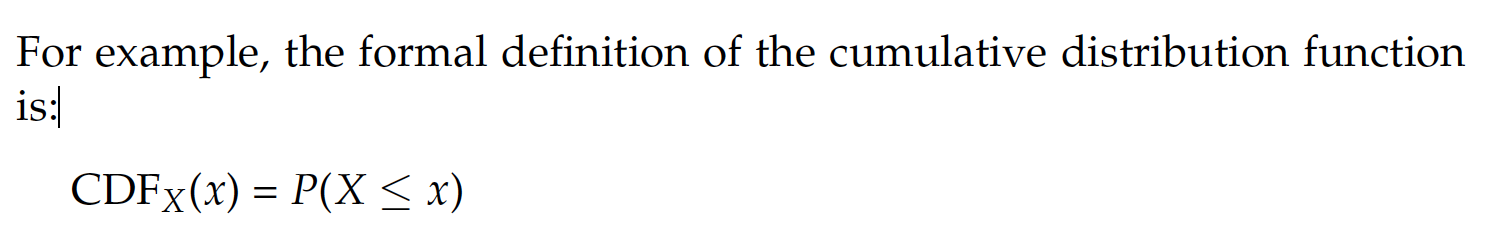
* As a computer scientist, it is helpful to think of a random variable as an object that provides a method, which I will call `generate`, that uses a random process to generate values.

        class RandomVariable(object):
            """Parent class for all random variables."""
        class Exponential(RandomVariable):
            def __init__(self, lam):
                self.lam = lam
            
            def generate(self):
            return random.expovariate(self.lam)
* `init` takes the parameter lambda and stores it as an attribute
* the generate method returns a random value from the exponential distribution with that parameter